# Note book for analysis CHEMBL target info

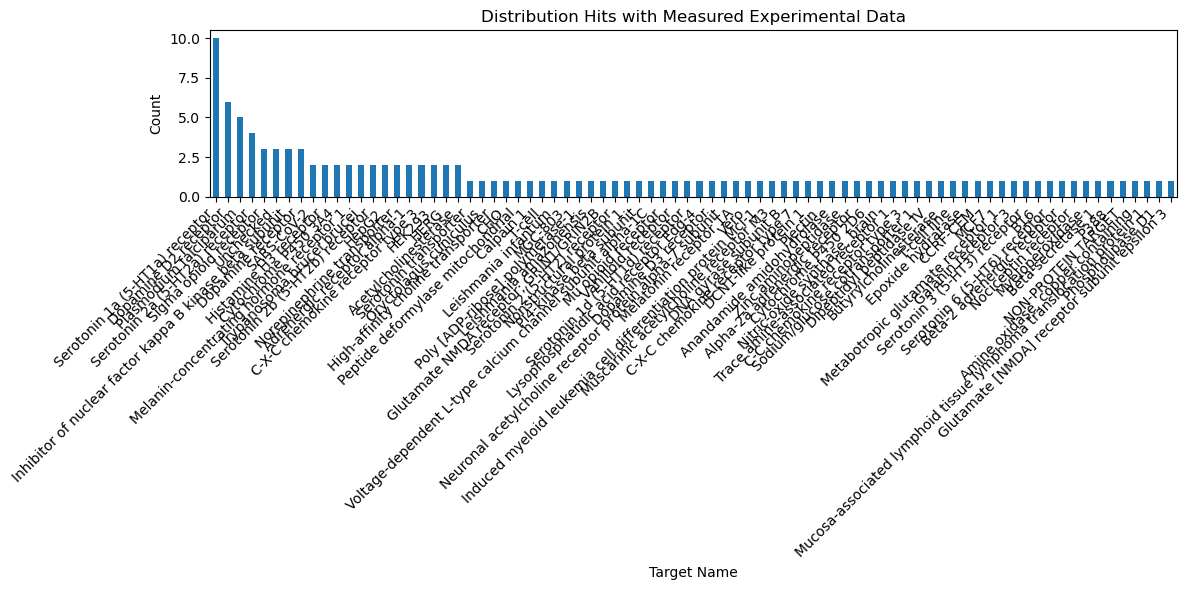

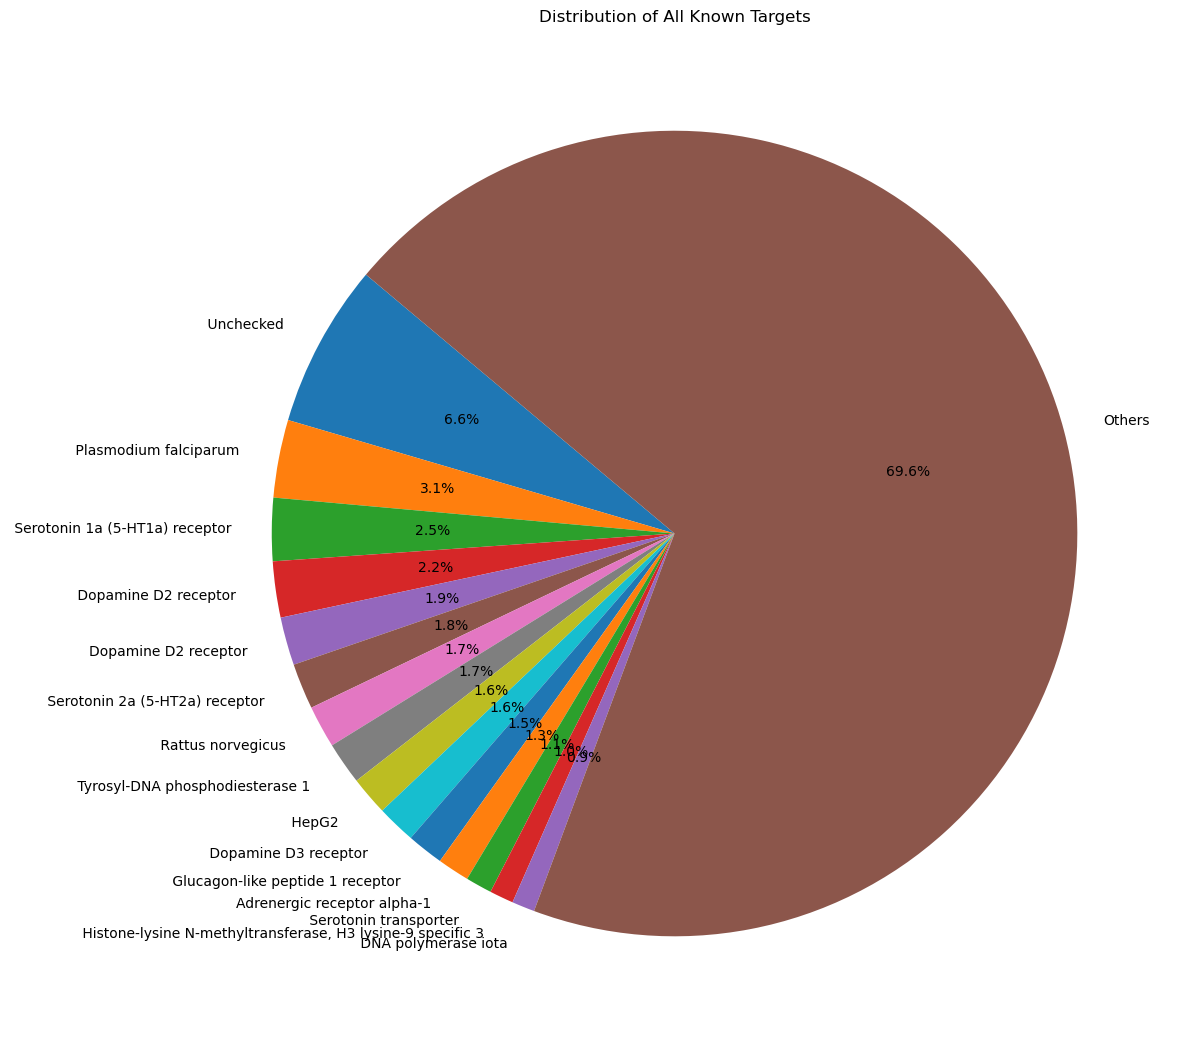

Total occurrences of 'Muscarinic' across all entries: 20
Number of entries containing 'Muscarinic': 13
Distribution of Muscarinic counts per entry:
all_known_targets
0    415
1     10
2      1
3      1
5      1
Name: count, dtype: int64
Top 20 rows with the lowest affinity_pred_value:
                                            model_path  model_index  \
106  ./boltz_results_CHEMBL35743/predictions/CHEMBL...            0   
129  ./boltz_results_CHEMBL3892440/predictions/CHEM...            0   
83   ./boltz_results_CHEMBL53039/predictions/CHEMBL...            0   
99   ./boltz_results_CHEMBL596885/predictions/CHEMB...            0   
42   ./boltz_results_CHEMBL315772/predictions/CHEMB...            0   
34   ./boltz_results_CHEMBL2420547/predictions/CHEM...            0   
417  ./boltz_results_CHEMBL368560/predictions/CHEMB...            0   
147  ./boltz_results_CHEMBL1725846/predictions/CHEM...            0   
6    ./boltz_results_CHEMBL3132913/predictions/CHEM...            0   
251 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Create output directories
base_output_dir = Path("TargetAnalysis")
base_output_dir.mkdir(exist_ok=True)

# Create subdirectory for basic analysis
basic_analysis_dir = base_output_dir / "01_BasicAnalysis"
basic_analysis_dir.mkdir(exist_ok=True)

input_file = ("Final_Filtered_models_with_ChemBL.csv")

# Read and load CSV file into a DataFrame
df = pd.read_csv(input_file)

# Firstly collate all the target_name data which has the measured experimental data
target_name_data = df['target_name'].value_counts()

# plot the target_name data as a bar chart
plt.figure(figsize=(12, 6))
target_name_data.plot(kind='bar')
plt.title('Distribution Hits with Measured Experimental Data')
plt.xlabel('Target Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(basic_analysis_dir / 'target_name_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Collated all the data from the 'all_known_targets' column
all_known_targets_data = df['all_known_targets']

# all_known_targets_data is delimited by ';' so we need to split it and count occurrences
all_known_targets_data = all_known_targets_data.dropna().str.split(';').explode().value_counts()

# Need to curate this a little, plot only the top 15 targets and group the rest as 'others'
if len(all_known_targets_data) > 15:
    others_count = all_known_targets_data[15:].sum()
    all_known_targets_data = all_known_targets_data[:15]
    all_known_targets_data['Others'] = others_count

# plot as a pie chart
plt.figure(figsize=(12, 12))
all_known_targets_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of All Known Targets')
plt.ylabel('')  # Hide y-label for pie chart
plt.tight_layout()
plt.savefig(basic_analysis_dir / 'all_known_targets_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Save all known targets distribution data to CSV
all_known_targets_data.to_csv(basic_analysis_dir / 'all_known_targets_distribution.csv', header=['Count'])

# Count how many times "Muscarinic" appears in each entry of 'all_known_targets' column
muscarinic_counts = df['all_known_targets'].fillna('').str.count('Muscarinic')
total_muscarinic_occurrences = muscarinic_counts.sum()
entries_with_muscarinic = (muscarinic_counts > 0).sum()

print(f"Total occurrences of 'Muscarinic' across all entries: {total_muscarinic_occurrences}")
print(f"Number of entries containing 'Muscarinic': {entries_with_muscarinic}")
print(f"Distribution of Muscarinic counts per entry:")
print(muscarinic_counts.value_counts().sort_index())

# Save muscarinic statistics to files
muscarinic_stats = {
    'total_occurrences': total_muscarinic_occurrences,
    'entries_with_muscarinic': entries_with_muscarinic,
    'distribution': muscarinic_counts.value_counts().sort_index().to_dict()
}

# Save muscarinic distribution
muscarinic_counts.value_counts().sort_index().to_csv(basic_analysis_dir / 'muscarinic_counts_distribution.csv', header=['Count'])

# Save muscarinic statistics summary
with open(basic_analysis_dir / 'muscarinic_stats.csv', 'w') as f:
    f.write("Statistic,Value\n")
    f.write(f"Total Muscarinic Occurrences,{total_muscarinic_occurrences}\n")
    f.write(f"Entries with Muscarinic,{entries_with_muscarinic}\n")

# Sort the dataframe by the affinity_pred_value in ascending order and print the top 20 rows
sorted_df = df.sort_values(by='affinity_pred_value', ascending=True)
print("Top 20 rows with the lowest affinity_pred_value:")
print(sorted_df.head(20))

# Save top 20 with lowest affinity
sorted_df.head(20).to_csv(basic_analysis_dir / 'top20_affinity.csv', index=False)

# output sorted dataframe to a new CSV file in BasicAnalysis folder
output_file = basic_analysis_dir / (Path(input_file).stem + '_sorted_by_affinity_pred_value.csv')
sorted_df.to_csv(output_file, index=False)

print(f"\nBasic analysis outputs saved to {basic_analysis_dir} folder:")

[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerator
[07:04:36] DEPRECATION WARNING: please use MorganGenerat

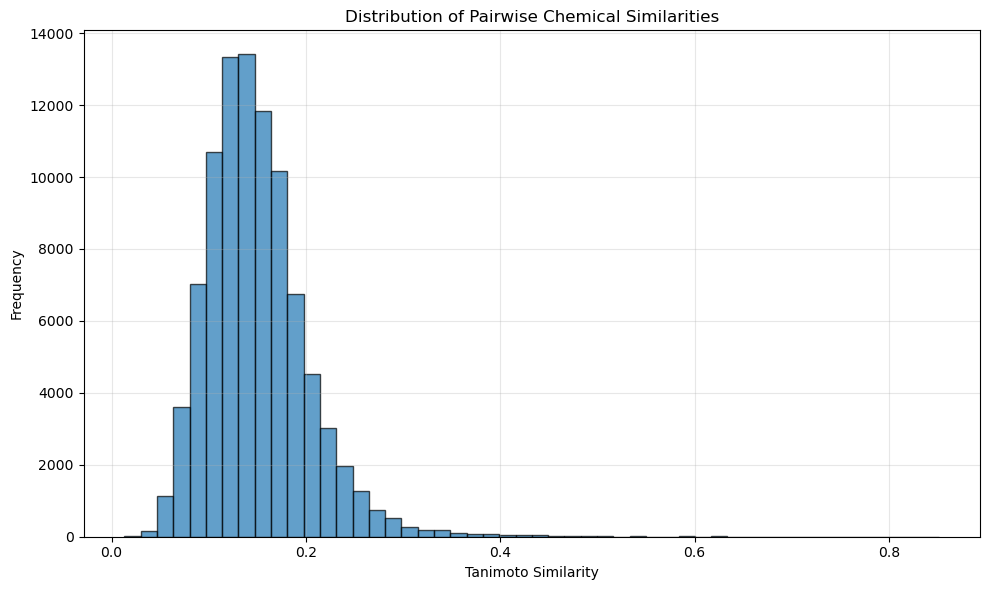

c:\Users\smeyo\anaconda3\envs\mastersproject\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\smeyo\anaconda3\envs\mastersproject\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


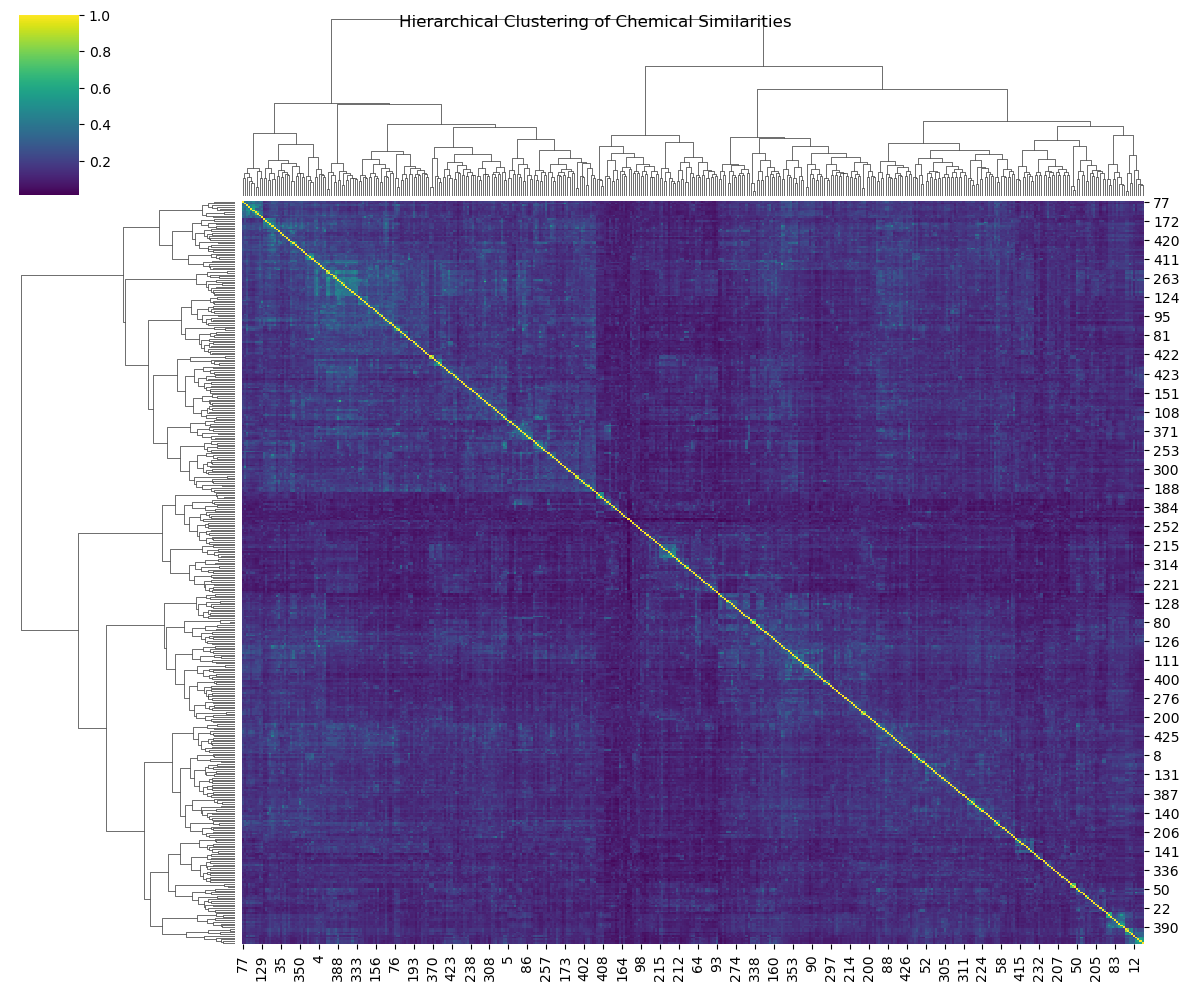

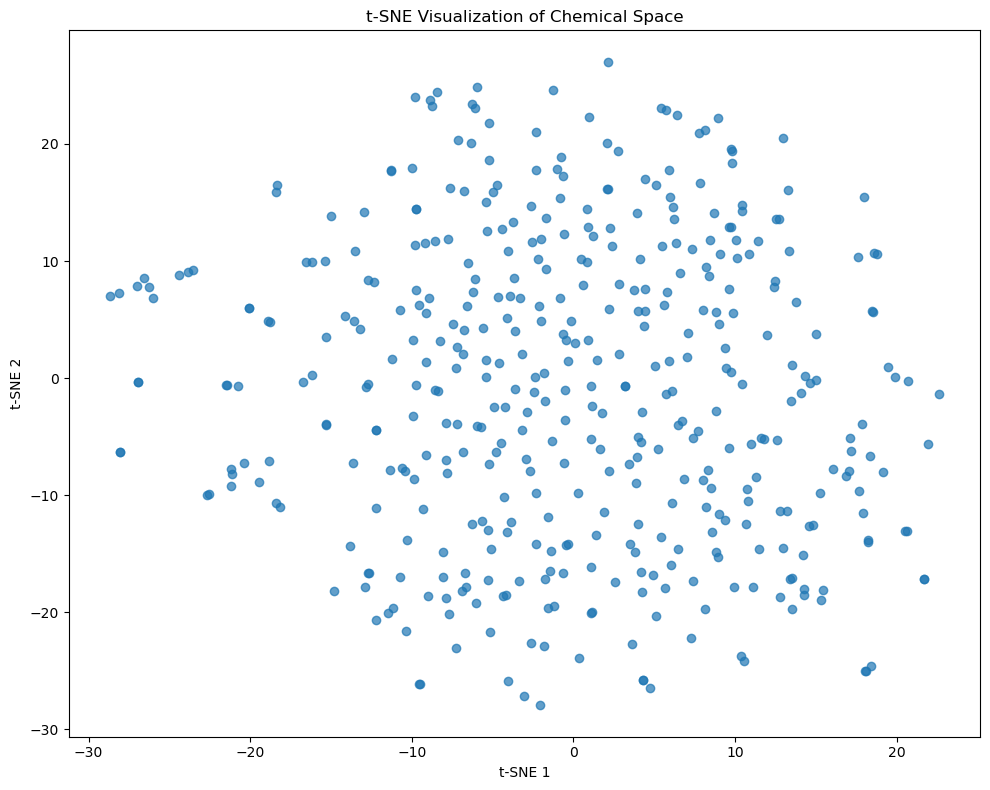

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit import DataStructs
import numpy as np
import matplotlib.pyplot as plt

# Create subdirectory for chemical similarity analysis
chem_similarity_dir = base_output_dir / "02_ChemicalSimilarity"
chem_similarity_dir.mkdir(exist_ok=True)

# Get smiles strings from the dataframe
smiles_list = df['smiles'].dropna().unique().tolist()

# Generate molecular fingerprints
fingerprints = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
        fingerprints.append(fp)

# Compute pairwise Tanimoto similarities
n = len(fingerprints)
similarity_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        similarity_matrix[i, j] = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])

# Save similarity matrix to CSV
np.savetxt(chem_similarity_dir / 'pairwise_similarity_matrix.csv', similarity_matrix, delimiter=',')

# 1. Histogram of similarity values
plt.figure(figsize=(10, 6))
# Get upper triangle of similarity matrix (excluding diagonal)
upper_triangle = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
plt.hist(upper_triangle, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Tanimoto Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Pairwise Chemical Similarities')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(chem_similarity_dir / 'pairwise_similarity_hist.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Clustermap with hierarchical clustering
import seaborn as sns
cluster_grid = sns.clustermap(similarity_matrix, cmap='viridis', annot=False, 
                             figsize=(12, 10), method='ward')
cluster_grid.fig.suptitle('Hierarchical Clustering of Chemical Similarities')
cluster_grid.savefig(chem_similarity_dir / 'chemical_similarity_clustermap.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. t-SNE dimensionality reduction plot
from sklearn.manifold import TSNE
# Convert fingerprints to numpy array
fp_array = np.array([list(fp) for fp in fingerprints])
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, n-1))
coords = tsne.fit_transform(fp_array)

plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], alpha=0.7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Chemical Space')
plt.tight_layout()
plt.savefig(chem_similarity_dir / 'tsne_chemical_space.png', dpi=300, bbox_inches='tight')
plt.show()

# Save t-SNE coordinates
tsne_df = pd.DataFrame({
    'smiles': smiles_list,
    'tsne_1': coords[:, 0],
    'tsne_2': coords[:, 1]
})
tsne_df.to_csv(chem_similarity_dir / 'tsne_coordinates.csv', index=False)

c:\Users\smeyo\anaconda3\envs\mastersproject\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


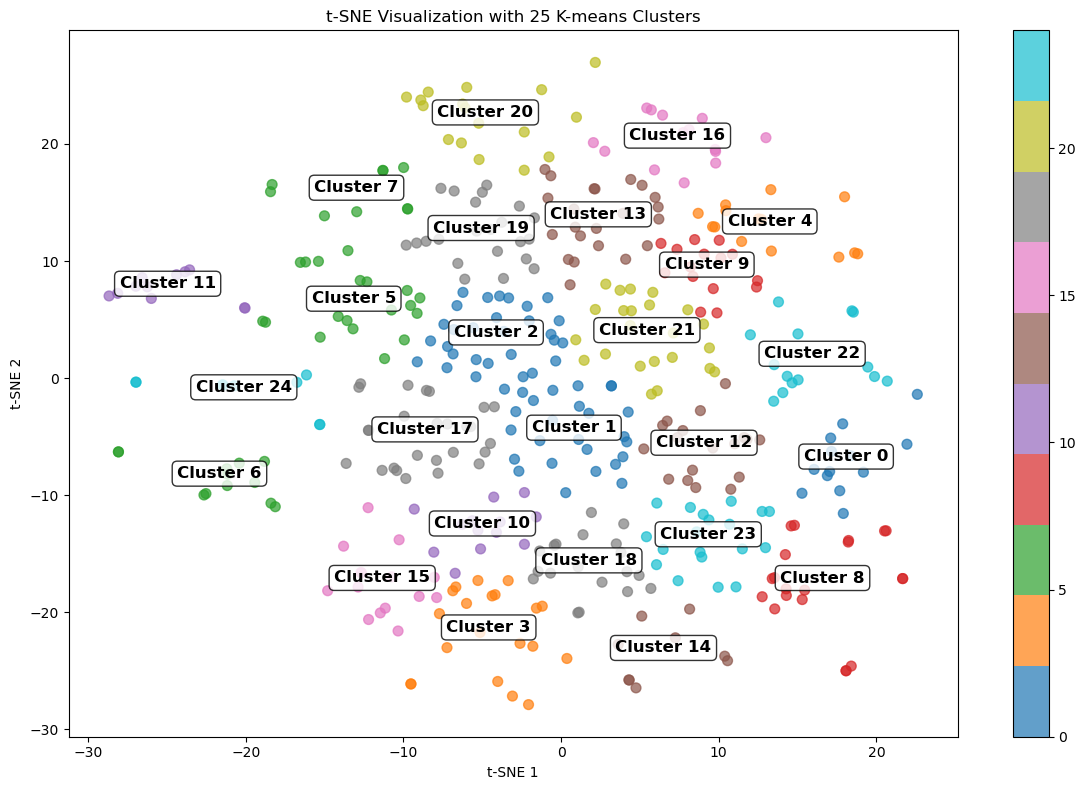

Representative structures for each cluster:

Cluster 0 (Size: 13 molecules):
Representative SMILES: O=C1OC2(CCN(CCc3c[nH]c4ccc(F)cc34)CC2)CN1Cc1ccc(Cl)cc1


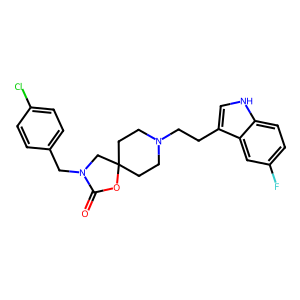


Cluster 1 (Size: 25 molecules):
Representative SMILES: CCN[C@H]1CCCN2c3ccccc3Oc3ccccc3[C@H]12


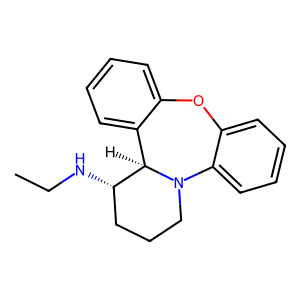


Cluster 2 (Size: 30 molecules):
Representative SMILES: CN(CCC(=O)N1CCN(CCNc2c3c(nc4ccccc24)CCCC3)CC1)C1CCCCC1


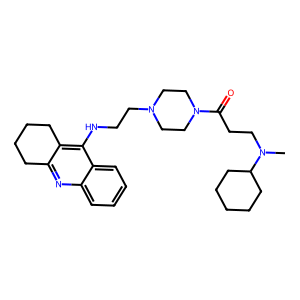


Cluster 3 (Size: 20 molecules):
Representative SMILES: Cc1ccc(OCc2cc(C(=O)N3CCN(C4CCCC4)CC3)no2)cc1C


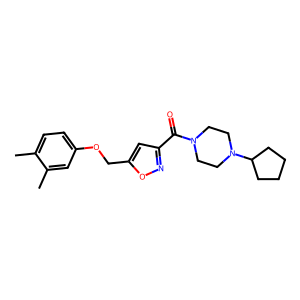


Cluster 4 (Size: 14 molecules):
Representative SMILES: COc1ccccc1N1CCN(CCOc2ccc3c(c2)NC(=O)CS3)CC1


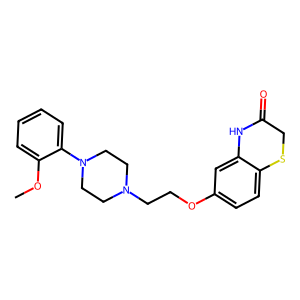


Cluster 5 (Size: 19 molecules):
Representative SMILES: Oc1ccc2c(CCCCN3CC=C(c4ccccc4)CC3)c[nH]c2c1


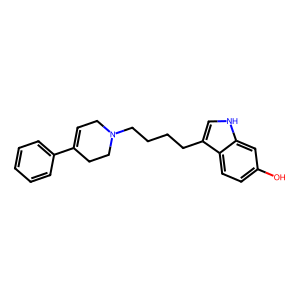


Cluster 6 (Size: 12 molecules):
Representative SMILES: O=C(CC1CCCCO1)N[C@H]1CC[C@H](CCN2CCC(c3cccc4c3OCO4)CC2)CC1


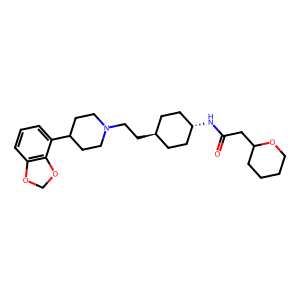


Cluster 7 (Size: 9 molecules):
Representative SMILES: CNc1cc(C)nc(C2COCCN2CCc2ccc(F)cc2)n1


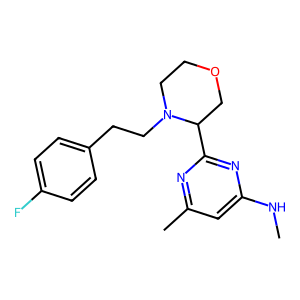


Cluster 8 (Size: 20 molecules):
Representative SMILES: CC(C)NCC(O)COc1ccc(Br)cc1/C=C/CO


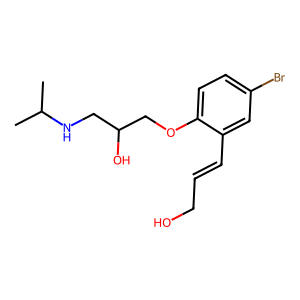


Cluster 9 (Size: 15 molecules):
Representative SMILES: COc1ccccc1N1CCN(Cc2ccc(OCCF)cc2)CC1


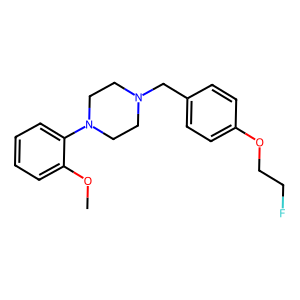


Cluster 10 (Size: 13 molecules):
Representative SMILES: O=C(NC12CC3CC(CC(C3)C1)C2)c1cnc2ccccc2n1


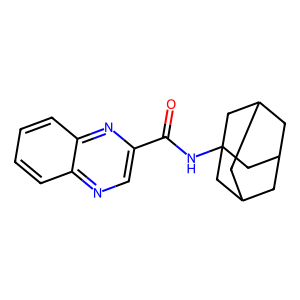


Cluster 11 (Size: 11 molecules):
Representative SMILES: CCN(CC)C(=O)N[C@@H]1C=C2c3cccc4[nH]cc(c34)C[C@@H]2N(C)C1


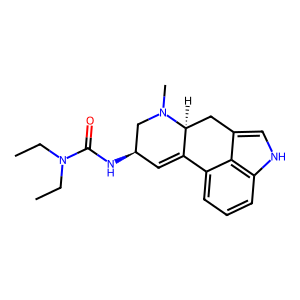


Cluster 12 (Size: 18 molecules):
Representative SMILES: CN(C)C1CCc2cc(O)c(Cl)cc2C1


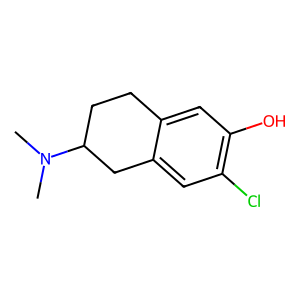


Cluster 13 (Size: 22 molecules):
Representative SMILES: COC1Cc2sccc2C2(CCN(CCCc3ccccc3)CC2)O1


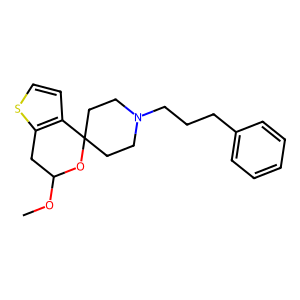


Cluster 14 (Size: 9 molecules):
Representative SMILES: COc1ccc(N2CC=C(c3ccc(C)cc3)C2=O)cc1OCCN1CCCCC1


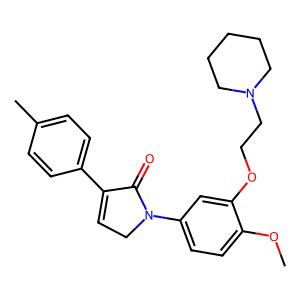


Cluster 15 (Size: 15 molecules):
Representative SMILES: O=C(Nc1cccc(I)c1)C1CC(=O)N(C2CCCCC2)C1


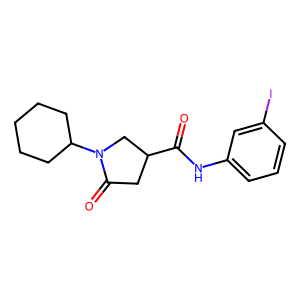


Cluster 16 (Size: 14 molecules):
Representative SMILES: CC1Oc2c(N3CCN(CCCc4c[nH]c5ccccc45)CC3)cccc2N(C)C1=O


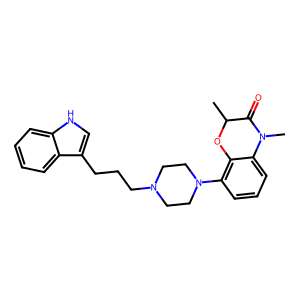


Cluster 17 (Size: 26 molecules):
Representative SMILES: C[C@H]1[C@H]2CC[C@H](c3ccccc3)CN2CC[C@@]1(C)c1cccc(O)c1


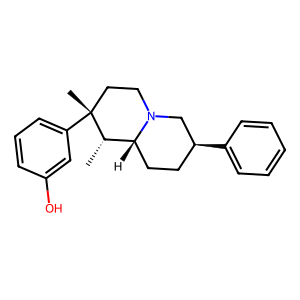


Cluster 18 (Size: 19 molecules):
Representative SMILES: CCOC(=O)c1sc(NC(=O)Nc2ccc(Cl)cc2)cc1C


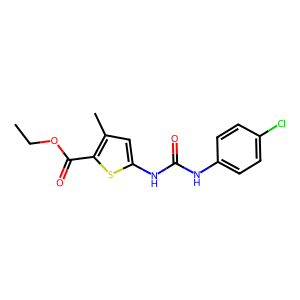


Cluster 19 (Size: 22 molecules):
Representative SMILES: CC(CN1CCN(c2ccc(F)cc2)CC1)Nc1nc(C2CC2)nc2ccccc12


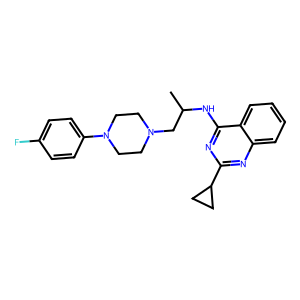


Cluster 20 (Size: 17 molecules):
Representative SMILES: CN1CCN(C2=Cc3cc(Cl)ccc3/C(=C/C#N)c3ccccc32)CC1


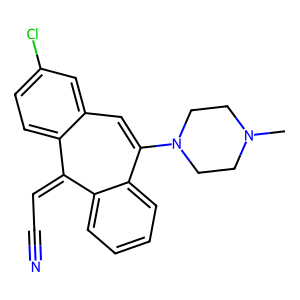


Cluster 21 (Size: 23 molecules):
Representative SMILES: O=C(CN1CCN(c2nc(-c3ccc(F)cc3)cs2)CC1)Nc1ccc2c(c1)OCO2


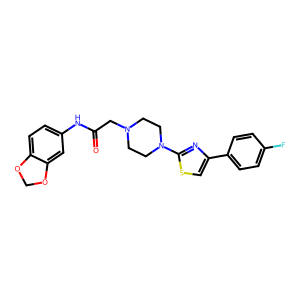


Cluster 22 (Size: 14 molecules):
Representative SMILES: COc1c(Br)c2c3c(c1OC)-c1cc4c(cc1CC3N(C)CC2)OCO4


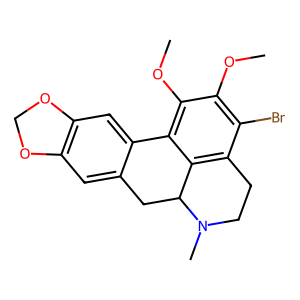


Cluster 23 (Size: 19 molecules):
Representative SMILES: COc1ccc(CNCCc2cc(OC)c(Br)cc2OC)cc1


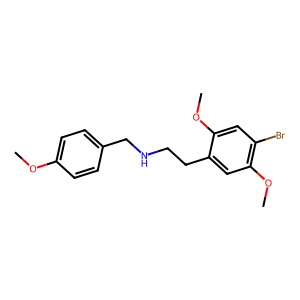


Cluster 24 (Size: 9 molecules):
Representative SMILES: NC(=O)c1ccc2c(c1)CCOC2CCN1CCC(c2c[nH]c3cc(F)ccc23)C1


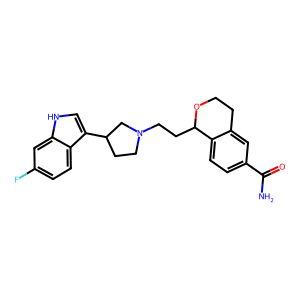


K-means cluster information saved to 'TargetAnalysis\03_KMeansClustering\chemical_clusters_kmeans.csv'
Cluster representatives saved to 'TargetAnalysis\03_KMeansClustering\cluster_representatives_kmeans.csv'
Representative structures saved as individual PNG files in TargetAnalysis\03_KMeansClustering
📋 Comprehensive HTML report created: 'TargetAnalysis\03_KMeansClustering\KMeans_Clustering_Report.html'
🌐 Open the HTML file in your browser to view all clusters and structures in one document!


In [ ]:
# 4. K-means clustering on t-SNE coordinates
from sklearn.cluster import KMeans

# Create subdirectory for K-means clustering analysis
kmeans_dir = base_output_dir / "03_KMeansClustering"
kmeans_dir.mkdir(exist_ok=True)

# Determine optimal number of clusters (you can adjust this)
n_clusters = 25
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(coords)

# Plot t-SNE with cluster colors and labels
plt.figure(figsize=(12, 8))
scatter = plt.scatter(coords[:, 0], coords[:, 1], c=cluster_labels, 
                     cmap='tab10', alpha=0.7, s=50)
plt.colorbar(scatter)

# Add cluster labels at centroid positions
for cluster_id in range(n_clusters):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    if len(cluster_indices) > 0:
        cluster_coords = coords[cluster_indices]
        centroid = np.mean(cluster_coords, axis=0)
        plt.annotate(f'Cluster {cluster_id}', 
                    xy=centroid, 
                    fontsize=12, 
                    fontweight='bold',
                    ha='center',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title(f't-SNE Visualization with {n_clusters} K-means Clusters')
plt.tight_layout()
plt.savefig(kmeans_dir / 'tsne_kmeans_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

# Function to find representative structure for each cluster
def find_cluster_representatives(fingerprints, smiles_list, cluster_labels, coords):
    """
    Find the most representative structure for each cluster.
    Returns the structure closest to the cluster centroid.
    """
    representatives = {}
    
    for cluster_id in range(n_clusters):
        # Get indices of molecules in this cluster
        cluster_indices = np.where(cluster_labels == cluster_id)[0]
        
        if len(cluster_indices) == 0:
            continue
            
        # Get t-SNE coordinates for this cluster
        cluster_coords = coords[cluster_indices]
        
        # Calculate centroid of cluster in t-SNE space
        centroid = np.mean(cluster_coords, axis=0)
        
        # Find molecule closest to centroid
        distances = np.sqrt(np.sum((cluster_coords - centroid)**2, axis=1))
        closest_idx = cluster_indices[np.argmin(distances)]
        
        representatives[cluster_id] = {
            'smiles': smiles_list[closest_idx],
            'index': closest_idx,
            'cluster_size': len(cluster_indices),
            'centroid': centroid
        }
    
    return representatives

# Get representatives for each cluster
cluster_reps = find_cluster_representatives(fingerprints, smiles_list, cluster_labels, coords)

# Display representative structures
from rdkit.Chem import Draw
from IPython.display import display

print("Representative structures for each cluster:")
rep_data = []
for cluster_id, rep_info in cluster_reps.items():
    print(f"\nCluster {cluster_id} (Size: {rep_info['cluster_size']} molecules):")
    print(f"Representative SMILES: {rep_info['smiles']}")
    
    # Create molecule image and save it
    mol = Chem.MolFromSmiles(rep_info['smiles'])
    if mol is not None:
        img = Draw.MolToImage(mol, size=(300, 300))
        # Save individual cluster representative images
        img.save(kmeans_dir / f'cluster_kmeans_{cluster_id}_representative.png')
        display(img)
    
    # Store data for CSV export
    rep_data.append({
        'cluster_id': cluster_id,
        'cluster_size': rep_info['cluster_size'],
        'representative_smiles': rep_info['smiles'],
        'centroid_x': rep_info['centroid'][0],
        'centroid_y': rep_info['centroid'][1]
    })

# Save cluster representatives to CSV
rep_df = pd.DataFrame(rep_data)
rep_df.to_csv(kmeans_dir / 'cluster_representatives_kmeans.csv', index=False)

# Save detailed cluster representatives to text file  
with open(kmeans_dir / 'cluster_representatives_kmeans.txt', 'w') as f:
    f.write("K-means Clustering Representatives\n")
    f.write("="*50 + "\n\n")
    for cluster_id, rep_info in cluster_reps.items():
        f.write(f"Cluster {cluster_id} (Size: {rep_info['cluster_size']} molecules)\n")
        f.write(f"Representative SMILES: {rep_info['smiles']}\n")
        f.write(f"Centroid: ({rep_info['centroid'][0]:.3f}, {rep_info['centroid'][1]:.3f})\n")
        f.write("-"*50 + "\n")

# Create comprehensive HTML report with embedded images
import base64
from io import BytesIO

html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>K-means Clustering Analysis Report</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 20px; }}
        .cluster {{ border: 1px solid #ccc; margin: 20px 0; padding: 15px; border-radius: 5px; }}
        .cluster-header {{ background-color: #f0f0f0; padding: 10px; margin: -15px -15px 15px -15px; border-radius: 5px 5px 0 0; }}
        .molecule-img {{ max-width: 300px; height: auto; border: 1px solid #ddd; margin: 10px 0; }}
        .stats {{ background-color: #f9f9f9; padding: 10px; margin: 10px 0; border-radius: 3px; }}
        .smiles {{ font-family: monospace; background-color: #f5f5f5; padding: 5px; border-radius: 3px; word-break: break-all; }}
    </style>
</head>
<body>
    <h1>K-means Clustering Analysis Report</h1>
    <div class="stats">
        <h2>Summary Statistics</h2>
        <p><strong>Total Clusters:</strong> {n_clusters}</p>
        <p><strong>Total Molecules:</strong> {len(smiles_list)}</p>
    </div>
"""

# Add each cluster to the HTML
for cluster_id, rep_info in sorted(cluster_reps.items()):
    mol = Chem.MolFromSmiles(rep_info['smiles'])
    if mol is not None:
        # Convert molecule image to base64 for embedding
        img = Draw.MolToImage(mol, size=(300, 300))
        buffer = BytesIO()
        img.save(buffer, format='PNG')
        img_str = base64.b64encode(buffer.getvalue()).decode()
        
        cluster_html = f"""
    <div class="cluster">
        <div class="cluster-header">
            <h3>Cluster {cluster_id}</h3>
        </div>
        <div class="stats">
            <p><strong>Cluster Size:</strong> {rep_info['cluster_size']} molecules</p>
            <p><strong>Centroid Position:</strong> ({rep_info['centroid'][0]:.3f}, {rep_info['centroid'][1]:.3f})</p>
        </div>
        <h4>Representative Structure:</h4>
        <img src="data:image/png;base64,{img_str}" class="molecule-img" alt="Cluster {cluster_id} Representative">
        <h4>SMILES:</h4>
        <div class="smiles">{rep_info['smiles']}</div>
    </div>
"""
        html_content += cluster_html

html_content += """
</body>
</html>
"""

# Save HTML report
html_file = kmeans_dir / 'KMeans_Clustering_Report.html'
with open(html_file, 'w', encoding='utf-8') as f:
    f.write(html_content)

# Save cluster information to DataFrame
cluster_df = pd.DataFrame({
    'smiles': smiles_list,
    'cluster': cluster_labels,
    't_sne_1': coords[:, 0],
    't_sne_2': coords[:, 1]
})

cluster_df.to_csv(kmeans_dir / 'chemical_clusters_kmeans.csv', index=False)
print(f"\nK-means cluster information saved to '{kmeans_dir / 'chemical_clusters_kmeans.csv'}'")
print(f"Cluster representatives saved to '{kmeans_dir / 'cluster_representatives_kmeans.csv'}'")
print(f"Representative structures saved as individual PNG files in {kmeans_dir}")
print(f"Comprehensive HTML report created: '{html_file}'")
print(f"Open the HTML file in your browser to view all clusters and structures in one document!")

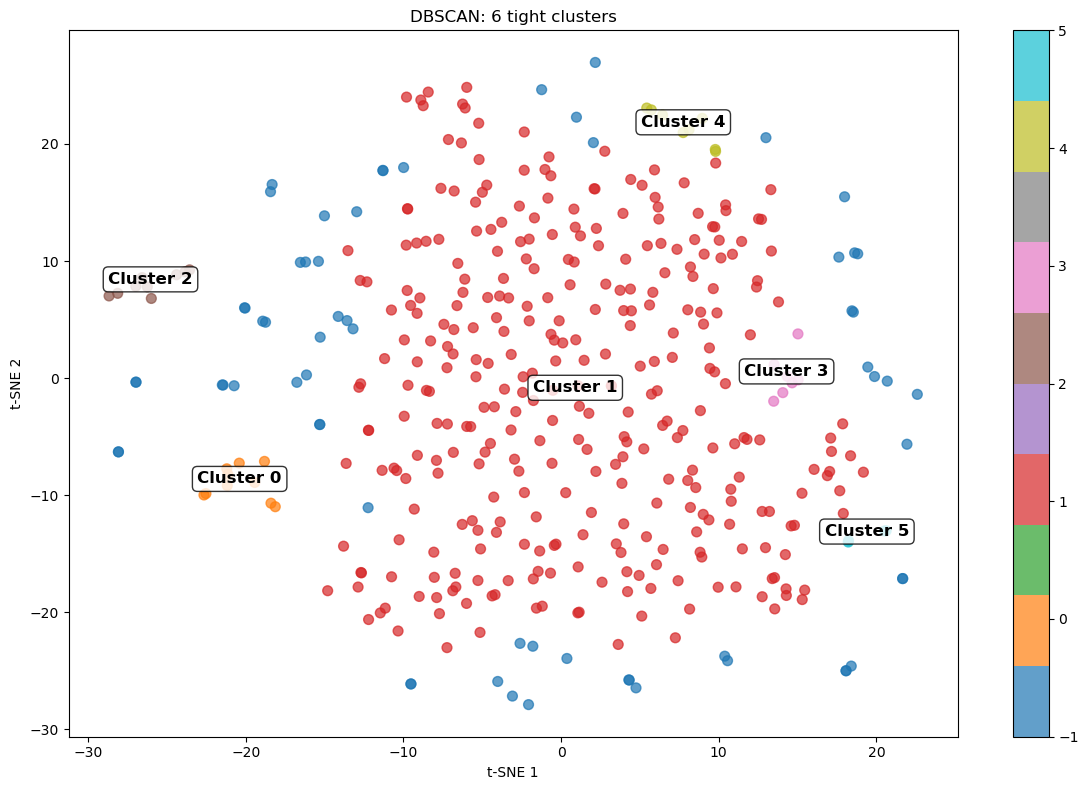

Number of tight clusters: 6

Representative structures for each DBSCAN cluster:

Cluster 0 (Size: 10 molecules):
Representative SMILES: Cc1cc(CC(=O)N[C@H]2CC[C@H](CCN3CCC(c4cccc5c4CCO5)CC3)CC2)on1


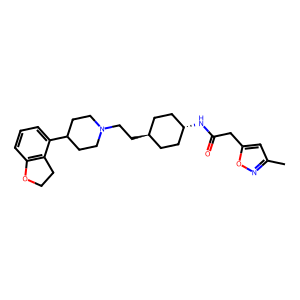


Cluster 1 (Size: 326 molecules):
Representative SMILES: COCCN1CCC2(CC1)CC(OCC1CC1)c1ccc(C)cc12


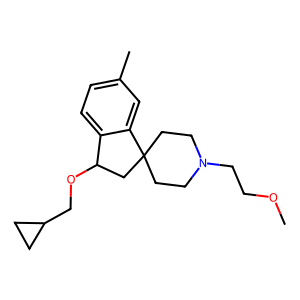


Cluster 2 (Size: 9 molecules):
Representative SMILES: CCN(CC)C(=O)N[C@@H]1CC2c3cccc4[nH]cc(c34)CC2N(C)C1


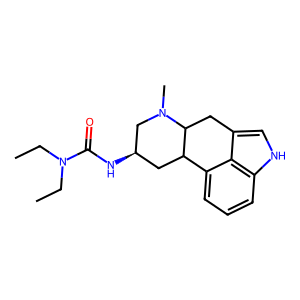


Cluster 3 (Size: 7 molecules):
Representative SMILES: COc1ccc2c(c1OC)C[C@@H]1c3c(cc4c(c3-2)OCO4)CCN1C


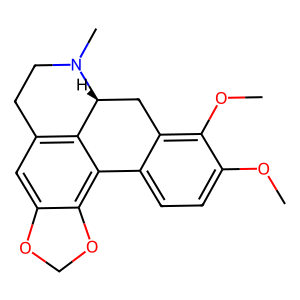


Cluster 4 (Size: 8 molecules):
Representative SMILES: c1cc2c(c(N3CCN(CCc4c[nH]c5ccccc45)CC3)c1)OCCO2


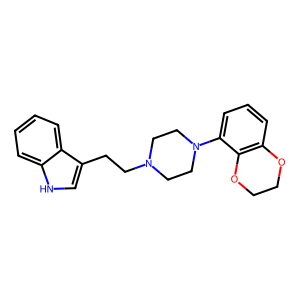


Cluster 5 (Size: 4 molecules):
Representative SMILES: Clc1ccc(CNCCCCCc2c[nH]cn2)cc1


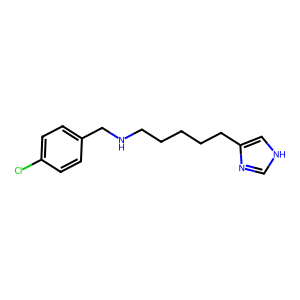


DBSCAN cluster information saved to 'TargetAnalysis\04_DBSCANClustering\chemical_clusters_dbscan.csv'
DBSCAN cluster representatives saved to 'TargetAnalysis\04_DBSCANClustering\cluster_representatives_dbscan.csv'
DBSCAN representative structures saved as individual PNG files in TargetAnalysis\04_DBSCANClustering
📋 Comprehensive DBSCAN HTML report created: 'TargetAnalysis\04_DBSCANClustering\DBSCAN_Clustering_Report.html'
🌐 Open the HTML file in your browser to view all DBSCAN clusters and structures in one document!


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Create subdirectory for DBSCAN clustering analysis
dbscan_dir = base_output_dir / "04_DBSCANClustering"
dbscan_dir.mkdir(exist_ok=True)

# Standardize the t-SNE coordinates
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# DBSCAN clustering - adjust eps and min_samples for tightness
dbscan = DBSCAN(eps=0.25, min_samples=5)  # Lower eps = tighter clusters
cluster_labels = dbscan.fit_predict(coords_scaled)

# Plot results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(coords[:, 0], coords[:, 1], c=cluster_labels, 
                     cmap='tab10', alpha=0.7, s=50)
plt.colorbar(scatter)

# Count clusters (excluding noise points labeled as -1)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Add cluster labels at centroid positions
unique_clusters = set(cluster_labels)
if -1 in unique_clusters:
    unique_clusters.remove(-1)  # Remove noise points

for cluster_id in unique_clusters:
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    if len(cluster_indices) > 0:
        cluster_coords = coords[cluster_indices]
        centroid = np.mean(cluster_coords, axis=0)
        plt.annotate(f'Cluster {cluster_id}', 
                    xy=centroid, 
                    fontsize=12, 
                    fontweight='bold',
                    ha='center',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title(f'DBSCAN: {n_clusters} tight clusters')
plt.tight_layout()
plt.savefig(dbscan_dir / 'tsne_dbscan_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Number of tight clusters: {n_clusters}")

# Function to find representative structure for each cluster
def find_cluster_representatives_dbscan(fingerprints, smiles_list, cluster_labels, coords):
    """
    Find the most representative structure for each cluster.
    Returns the structure closest to the cluster centroid.
    """
    representatives = {}
    unique_clusters = set(cluster_labels)
    if -1 in unique_clusters:
        unique_clusters.remove(-1)  # Remove noise points
    
    for cluster_id in unique_clusters:
        # Get indices of molecules in this cluster
        cluster_indices = np.where(cluster_labels == cluster_id)[0]
        
        if len(cluster_indices) == 0:
            continue
            
        # Get t-SNE coordinates for this cluster
        cluster_coords = coords[cluster_indices]
        
        # Calculate centroid of cluster in t-SNE space
        centroid = np.mean(cluster_coords, axis=0)
        
        # Find molecule closest to centroid
        distances = np.sqrt(np.sum((cluster_coords - centroid)**2, axis=1))
        closest_idx = cluster_indices[np.argmin(distances)]
        
        representatives[cluster_id] = {
            'smiles': smiles_list[closest_idx],
            'index': closest_idx,
            'cluster_size': len(cluster_indices),
            'centroid': centroid
        }
    
    return representatives

# Get representatives for each cluster
cluster_reps = find_cluster_representatives_dbscan(fingerprints, smiles_list, cluster_labels, coords)

# Display representative structures
from rdkit.Chem import Draw
from IPython.display import display

print("\nRepresentative structures for each DBSCAN cluster:")
rep_data = []
for cluster_id, rep_info in cluster_reps.items():
    print(f"\nCluster {cluster_id} (Size: {rep_info['cluster_size']} molecules):")
    print(f"Representative SMILES: {rep_info['smiles']}")
    
    # Create molecule image and save it
    mol = Chem.MolFromSmiles(rep_info['smiles'])
    if mol is not None:
        img = Draw.MolToImage(mol, size=(300, 300))
        # Save individual cluster representative images
        img.save(dbscan_dir / f'cluster_dbscan_{cluster_id}_representative.png')
        display(img)
    
    # Store data for CSV export
    rep_data.append({
        'cluster_id': cluster_id,
        'cluster_size': rep_info['cluster_size'],
        'representative_smiles': rep_info['smiles'],
        'centroid_x': rep_info['centroid'][0],
        'centroid_y': rep_info['centroid'][1]
    })

# Save cluster representatives to CSV
rep_df = pd.DataFrame(rep_data)
rep_df.to_csv(dbscan_dir / 'cluster_representatives_dbscan.csv', index=False)

# Save detailed cluster representatives to text file  
with open(dbscan_dir / 'cluster_representatives_dbscan.txt', 'w') as f:
    f.write("DBSCAN Clustering Representatives\n")
    f.write("="*50 + "\n\n")
    f.write(f"Number of tight clusters: {n_clusters}\n\n")
    for cluster_id, rep_info in cluster_reps.items():
        f.write(f"Cluster {cluster_id} (Size: {rep_info['cluster_size']} molecules)\n")
        f.write(f"Representative SMILES: {rep_info['smiles']}\n")
        f.write(f"Centroid: ({rep_info['centroid'][0]:.3f}, {rep_info['centroid'][1]:.3f})\n")
        f.write("-"*50 + "\n")

# Create comprehensive HTML report for DBSCAN
import base64
from io import BytesIO

dbscan_html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>DBSCAN Clustering Analysis Report</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 20px; }}
        .cluster {{ border: 1px solid #ccc; margin: 20px 0; padding: 15px; border-radius: 5px; }}
        .cluster-header {{ background-color: #f0f0f0; padding: 10px; margin: -15px -15px 15px -15px; border-radius: 5px 5px 0 0; }}
        .molecule-img {{ max-width: 300px; height: auto; border: 1px solid #ddd; margin: 10px 0; }}
        .stats {{ background-color: #f9f9f9; padding: 10px; margin: 10px 0; border-radius: 3px; }}
        .smiles {{ font-family: monospace; background-color: #f5f5f5; padding: 5px; border-radius: 3px; word-break: break-all; }}
    </style>
</head>
<body>
    <h1>DBSCAN Clustering Analysis Report</h1>
    <div class="stats">
        <h2>Summary Statistics</h2>
        <p><strong>Total Tight Clusters:</strong> {n_clusters}</p>
        <p><strong>Total Molecules:</strong> {len(smiles_list)}</p>
    </div>
"""

# Add each DBSCAN cluster to the HTML
for cluster_id, rep_info in sorted(cluster_reps.items()):
    mol = Chem.MolFromSmiles(rep_info['smiles'])
    if mol is not None:
        # Convert molecule image to base64 for embedding
        img = Draw.MolToImage(mol, size=(300, 300))
        buffer = BytesIO()
        img.save(buffer, format='PNG')
        img_str = base64.b64encode(buffer.getvalue()).decode()
        
        cluster_html = f"""
    <div class="cluster">
        <div class="cluster-header">
            <h3>Cluster {cluster_id}</h3>
        </div>
        <div class="stats">
            <p><strong>Cluster Size:</strong> {rep_info['cluster_size']} molecules</p>
            <p><strong>Centroid Position:</strong> ({rep_info['centroid'][0]:.3f}, {rep_info['centroid'][1]:.3f})</p>
        </div>
        <h4>Representative Structure:</h4>
        <img src="data:image/png;base64,{img_str}" class="molecule-img" alt="Cluster {cluster_id} Representative">
        <h4>SMILES:</h4>
        <div class="smiles">{rep_info['smiles']}</div>
    </div>
"""
        dbscan_html_content += cluster_html

dbscan_html_content += """
</body>
</html>
"""

# Save DBSCAN HTML report
dbscan_html_file = dbscan_dir / 'DBSCAN_Clustering_Report.html'
with open(dbscan_html_file, 'w', encoding='utf-8') as f:
    f.write(dbscan_html_content)

# Save cluster information to DataFrame
cluster_df = pd.DataFrame({
    'smiles': smiles_list,
    'cluster': cluster_labels,
    't_sne_1': coords[:, 0],
    't_sne_2': coords[:, 1]
})

cluster_df.to_csv(dbscan_dir / 'chemical_clusters_dbscan.csv', index=False)
print(f"\nDBSCAN cluster information saved to '{dbscan_dir / 'chemical_clusters_dbscan.csv'}'")
print(f"DBSCAN cluster representatives saved to '{dbscan_dir / 'cluster_representatives_dbscan.csv'}'")
print(f"DBSCAN representative structures saved as individual PNG files in {dbscan_dir}")
print(f"Comprehensive DBSCAN HTML report created: '{dbscan_html_file}'")
print(f"Open the HTML file in your browser to view all DBSCAN clusters and structures in one document!")